# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# Rename all the columns to lower case
df.columns = map(str.lower, df.columns)

Change the index to `'linename'`: 

In [4]:
# Change the index to 'linename'
df = df.set_index('linename')

In [5]:
df.head(5)

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [6]:
# Reset the index
df = df.reset_index()

In [7]:
df.head(5)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [8]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].map(len)

In [9]:
df = df.set_index('Num_Lines').sort_index()

In [10]:
df.head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
Num_Lines,,,,,,,,,,,
1,F,N528,R257,01-06-01,EAST BROADWAY,IND,08/31/2018,08:00:00,REGULAR,3118060,2484444
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/26/2018,12:16:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/26/2018,08:04:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/26/2018,03:52:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/25/2018,23:40:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/25/2018,19:28:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/25/2018,15:16:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/25/2018,11:04:23,REGULAR,32880,599640
1,1,PTH12,R542,00-04-01,TWENTY THIRD ST,PTH,08/25/2018,06:52:23,REGULAR,32880,599640


In [11]:
df.tail(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
Num_Lines,,,,,,,,,,,
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/25/2018,22:00:00,REGULAR,19923165,3625048
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/25/2018,18:00:00,REGULAR,19922807,3624367
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/25/2018,14:00:00,REGULAR,19922328,3623772
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/25/2018,10:00:00,REGULAR,19922016,3623230
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/25/2018,06:00:00,REGULAR,19921896,3622961
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/25/2018,02:00:00,REGULAR,19921835,3622893
12,ACENQRS1237W,N062A,R010,00-05-00,42 ST-PORT AUTH,IND,08/31/2018,22:00:00,REGULAR,68627697,18799211
12,ACENQRS1237W,N062A,R010,00-05-00,42 ST-PORT AUTH,IND,08/31/2018,18:00:00,REGULAR,68627387,18798693
12,ACENQRS1237W,N062A,R010,00-05-01,42 ST-PORT AUTH,IND,08/27/2018,02:00:00,REGULAR,19924585,3627300


Write a function to clean column names: 

In [12]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.lower().strip()
    return cleaned

In [13]:
# Use the above function to clean the column names
df.columns = map(clean, df.columns)

In [14]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [16]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()

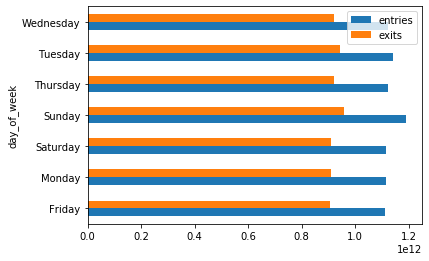

In [18]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [22]:
grouped.head(2)

,entries,exits
day_of_week,,
Friday,1110224700078,906799065337
Monday,1114237052454,911938153513


In [23]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head(5)

,day_of_week,entries,exits
0,Friday,1110224700078,906799065337
1,Monday,1114237052454,911938153513
2,Saturday,1115661545514,909142081474
3,Sunday,1192306179082,959223750461
4,Thursday,1122723988662,920691927110


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [35]:
# Use this dictionary to create a new column 
# weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}
weekend_map = {'Monday':False, 'Tuesday':False, 'Wednesday':False, 'Thursday':False, 'Friday':False, 'Saturday':True, 'Sunday':True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [36]:
grouped.head()

,day_of_week,entries,exits,is_weekend
0,Friday,1110224700078,906799065337,False
1,Monday,1114237052454,911938153513,False
2,Saturday,1115661545514,909142081474,True
3,Sunday,1192306179082,959223750461,True
4,Thursday,1122723988662,920691927110,False


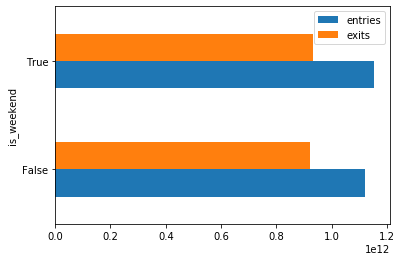

In [37]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [38]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a', 'scp'], axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,day_of_week
Num_Lines,,,,,,,,,,
1,F,R257,EAST BROADWAY,IND,2018-08-31,08:00:00,REGULAR,3118060,2484444,Friday
1,1,R542,TWENTY THIRD ST,PTH,2018-08-26,12:16:23,REGULAR,32880,599640,Sunday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

### Your answer here 
The plot title and x axis label are missing

## Summary

Great! You practiced your data cleanup skills using Pandas.